### 1. Importing necessary libraries - Environment Setup

In [1]:
#Numpy - used for scientific, numerical & array computation
import numpy as np

#Pandas - used for data analysis, importing data from various sources
import pandas as pd

#Matplot lib & Seaborn are graph plotting, data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Stats library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing Scikit library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [3]:
# Adjusting the display to fit rows and columns effectively
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 2. Exploratory Data Analysis (EDA)

In [5]:
#Read the provided data - day.csv
bike = pd.read_csv('day.csv')

In [6]:
# Verifying the dataset by printing the first 5 rows of the dataset
bike.head() #Creating a Dataframe "bike" and loading the "day.csv" dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#Let's inspect the "bike" Dimension and Size
print("Dimension - bike : ", bike.shape)
print("Size - bike      : ", bike.size)

Dimension - bike :  (730, 16)
Size - bike      :  11680


<div class="alert alert-block alert-info">
        <b>Data-Point:</b> 
        <p>The dataframe has <b>730 rows</b> and <b>16 columns</b></p>
        <p>The size of the dataframe is <b>11680 </b></p>
</div>

In [8]:
# Analysing the columns and their datatypes
bike.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<div class="alert alert-block alert-success">
        <b>Inference:</b> 
        <p>
            <ul>
                <li><b>"dteday"</b> is supposed to be of date type, all other are either float or integer type.</li>
                <li>There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.</li>
    </ul>
        </p>
</div>

In [9]:
#Analysing the numeric variables in the "bike"
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

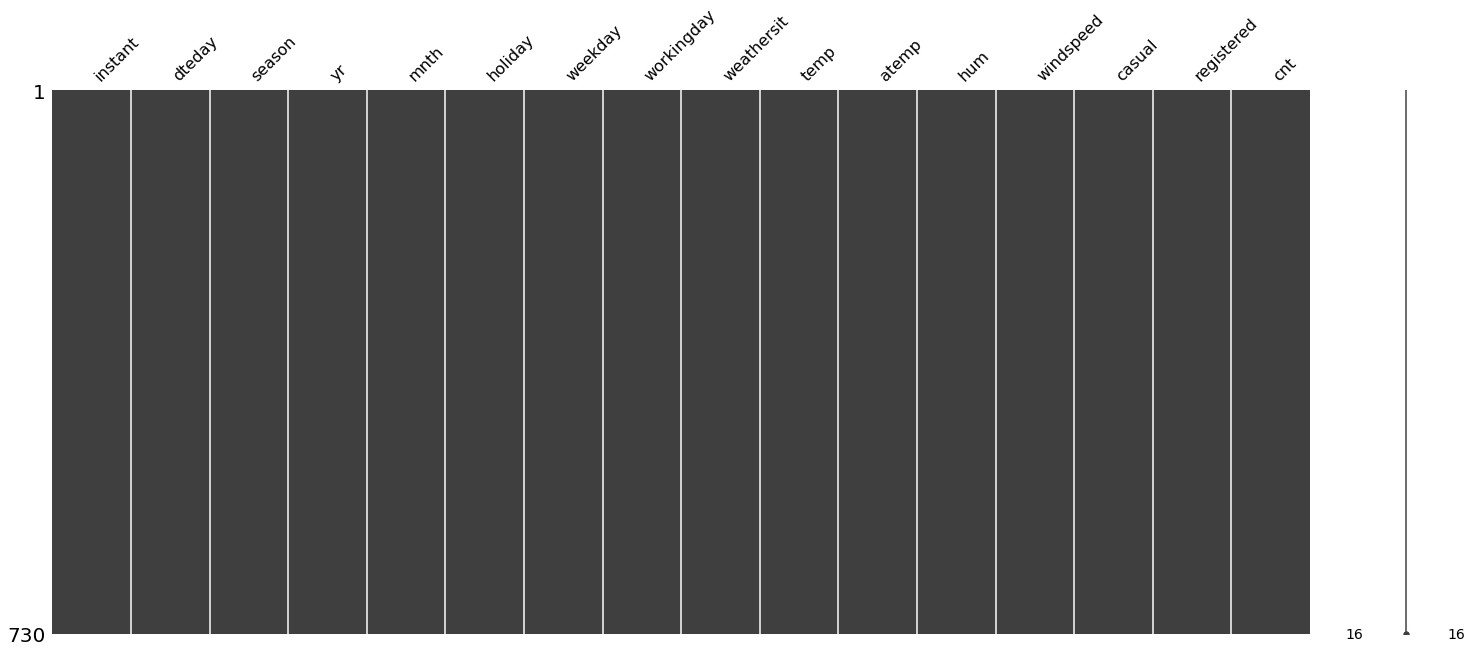

In [10]:
# Let's check the null or missing values for "bike"
# We are going to achieve this using the library "missingno" - Install "pip intall missingno" on terminal
import missingno as mn
mn.matrix(bike)

<div class="alert alert-block alert-success">
    <b>Inference:</b>
        <ul>
            <li>There are <b><u>no</u></b> missing values (Rows and Columns) in the entire dataframe</li> 
        </ul>
</div>

### 3. Data Cleaning

In [11]:
# Dropping the variables 'instant' and 'dteday'

bike.drop(['instant','dteday'], axis=1, inplace=True)

<div class="alert alert-block alert-warning">
        <b>Inference:</b>
        <ul>
            <li><b>'instant'</b>, record index and can be dropped</li>
            <li><b>'dteday'</b>, we have a seperate column for month and year and can be dropped</li>
        </ul>
</div>

<Figure size 1296x1080 with 0 Axes>

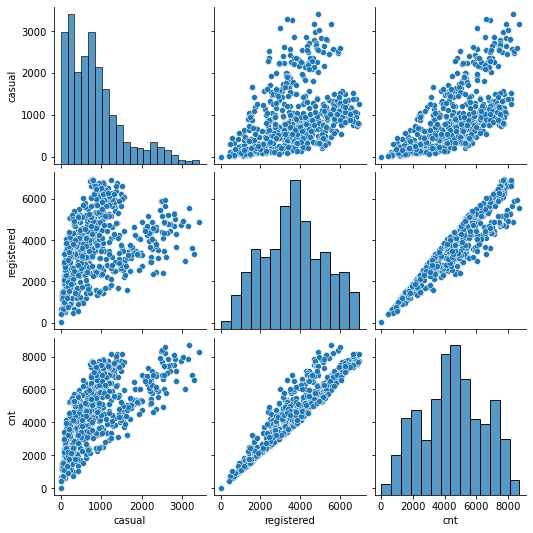

In [12]:
#Checking the correlation between 'casual','registered','cnt' using Pair plot
bike_fig = plt.figure(figsize=(18,15))
sns.pairplot(bike[['casual','registered','cnt']])
plt.show()

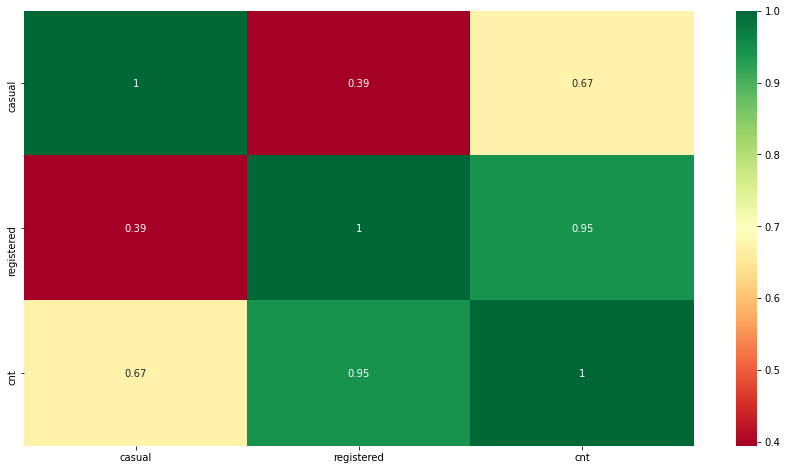

In [13]:
#Checking the correlation between 'casual','registered','cnt' using Heatmap
bike_fig = plt.figure(figsize=(15,8))
bike_corr = bike[['casual','registered','cnt']]
sns.heatmap(bike_corr.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [14]:
# Dropping the variables 'casual' and 'registered' as 'cnt' is the sum of 'casual' and 'registered'

bike.drop(['casual','registered'], axis=1, inplace=True)

<div class="alert alert-block alert-warning">
        <b>Inference:</b>
        <ul>
            <li><b>'casual' & 'registered'</b>- just signifies the categories of customers that we can infer from the above Pairplot & Heatmap, hence can be dropped</li>
        </ul>
</div>

In [15]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Let's inspect the "bike" Dimension and Size after dropping unnecessary columns
print("Dimension - bike : ", bike.shape)
print("Size - bike      : ", bike.size)

Dimension - bike :  (730, 12)
Size - bike      :  8760


<div class="alert alert-block alert-info">
        <b>Data-Point:</b> 
        <p>The dataframe has <b>730 rows</b> and <b>12 columns</b></p>
        <p>The size of the dataframe is <b>8760 </b></p>
</div>

### 4. Encoding and Data Visualisation

In [17]:
#Checking the columns in our bike dataframe
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [18]:
# Checking the number of unique values each column possess to distinguish between numerical & categorical variables
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

<div class="alert alert-block alert-info">
        <b>Inference:</b> 
    <p><b>Categorical Variables:</b> weathersit, season, weekday, mnth  </p>
    <p><b>Numerical Variables:</b> temp,hum, windspeed, atemp </p>
</div>

In [19]:
#Mapping the columns - season,yr,mnth,weathersit,weekday
bike['Seasons']    = bike['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike['Month']      = bike['mnth'].map({1:'January',2:'Feburary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike['Weekday']    = bike['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike['Weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

In [20]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Seasons,Month,Weekday,Weathersit
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,Spring,January,Monday,Mist_Cloudy
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,Spring,January,Tuesday,Mist_Cloudy
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,January,Wednesday,Clear
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,January,Thursday,Clear
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,January,Friday,Clear


In [21]:
#Dropping the old columns - season,yr,mnth,weathersit,weekday
bike.drop(['season','mnth','weekday','weathersit'], axis=1,inplace=True)

In [22]:
# Converting the variables into Categorical
cat_Cols = ['Weathersit','Seasons','Weekday','Month']
for cols in cat_Cols:
    bike[cols] =pd.Categorical(bike[cols])

#verifying the datatypes after conversion
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    int64   
 1   holiday     730 non-null    int64   
 2   workingday  730 non-null    int64   
 3   temp        730 non-null    float64 
 4   atemp       730 non-null    float64 
 5   hum         730 non-null    float64 
 6   windspeed   730 non-null    float64 
 7   cnt         730 non-null    int64   
 8   Seasons     730 non-null    category
 9   Month       730 non-null    category
 10  Weekday     730 non-null    category
 11  Weathersit  730 non-null    category
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Numerical Variable Analysis

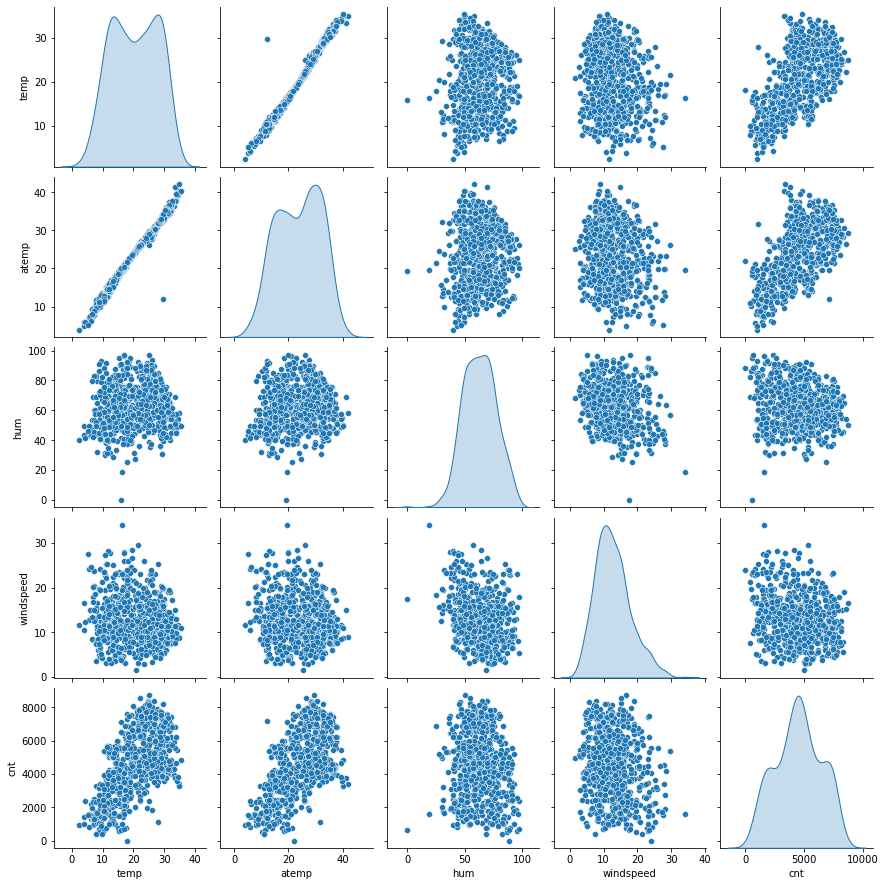

In [23]:
# Plotting a pairplot on the numerical variables
sns.pairplot(bike[[ 'temp','atemp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()

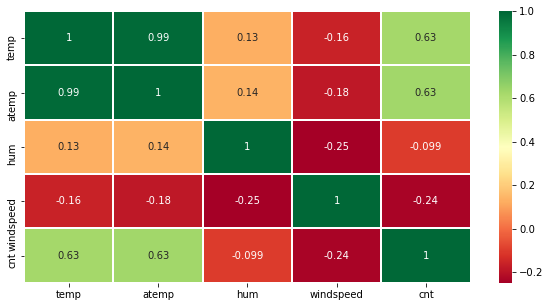

In [24]:
# plotting a heatmap on the Numerical variables to find the correlation

plt.figure(figsize = (10,5))
ax= sns.heatmap(bike[['temp','atemp', 'hum', 'windspeed','cnt']].corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

<div class="alert alert-block alert-warning">
        <b>Inference:</b>
        <ul>
            <li>From the above pairplot & heatmap we can see that there is high correlation between <b>'temp' and 'atemp' </b>either can be removed</li>
        </ul>
</div>

In [25]:
#Dropping the old columns - atemp
bike.drop(['atemp'], axis=1,inplace=True)

In [26]:
bike.shape

(730, 11)

#### Categorical Variable Analysis

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    int64   
 1   holiday     730 non-null    int64   
 2   workingday  730 non-null    int64   
 3   temp        730 non-null    float64 
 4   hum         730 non-null    float64 
 5   windspeed   730 non-null    float64 
 6   cnt         730 non-null    int64   
 7   Seasons     730 non-null    category
 8   Month       730 non-null    category
 9   Weekday     730 non-null    category
 10  Weathersit  730 non-null    category
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [28]:
# Season wise value counts
round((bike['Seasons'].value_counts(normalize=True)*100),3)

Fall      25.753
Summer    25.205
Spring    24.658
Winter    24.384
Name: Seasons, dtype: float64

In [29]:
# Month wise value counts
round((bike['Month'].value_counts(normalize=True)*100),3).sort_index()

April        8.219
August       8.493
December     8.493
Feburary     7.671
January      8.493
July         8.493
June         8.219
March        8.493
May          8.493
November     8.219
October      8.493
September    8.219
Name: Month, dtype: float64

In [30]:
# Weekday value counts
round((bike['Weekday'].value_counts(normalize=True)*100),3)

Tuesday      14.384
Monday       14.384
Wednesday    14.247
Thursday     14.247
Sunday       14.247
Saturday     14.247
Friday       14.247
Name: Weekday, dtype: float64

In [31]:
# Weathersit value counts
round((bike['Weathersit'].value_counts(normalize=True)*100),3)

Clear          63.425
Mist_Cloudy    33.699
Light_Snow      2.877
Name: Weathersit, dtype: float64

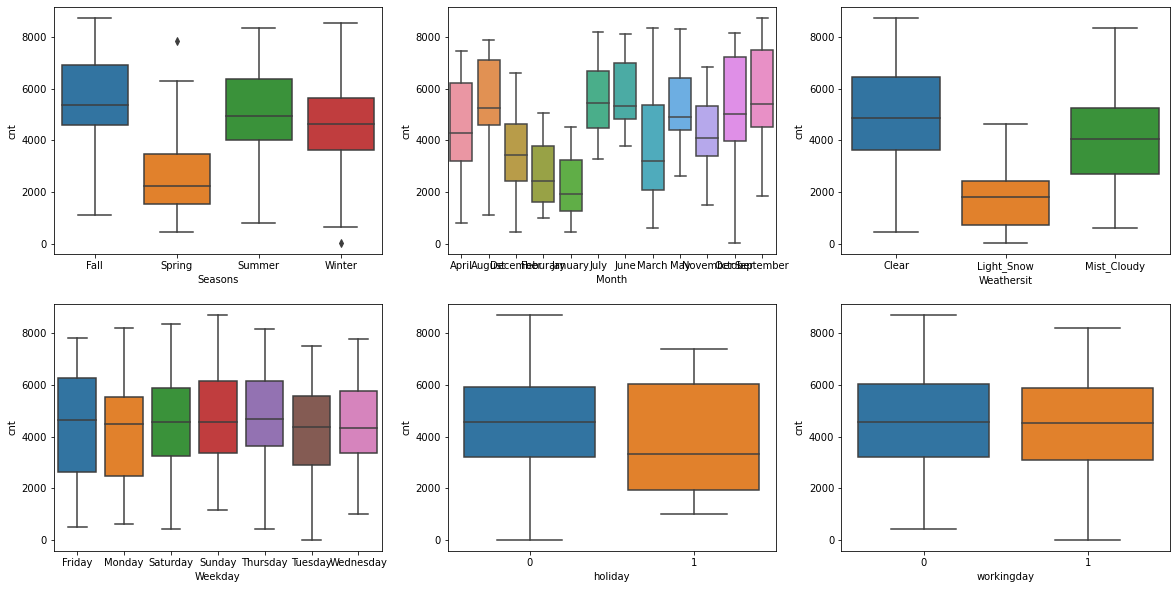

In [32]:
#Plotting subplots for all categorical variables against 'cnt'
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Seasons', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'Month', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'Weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'Weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

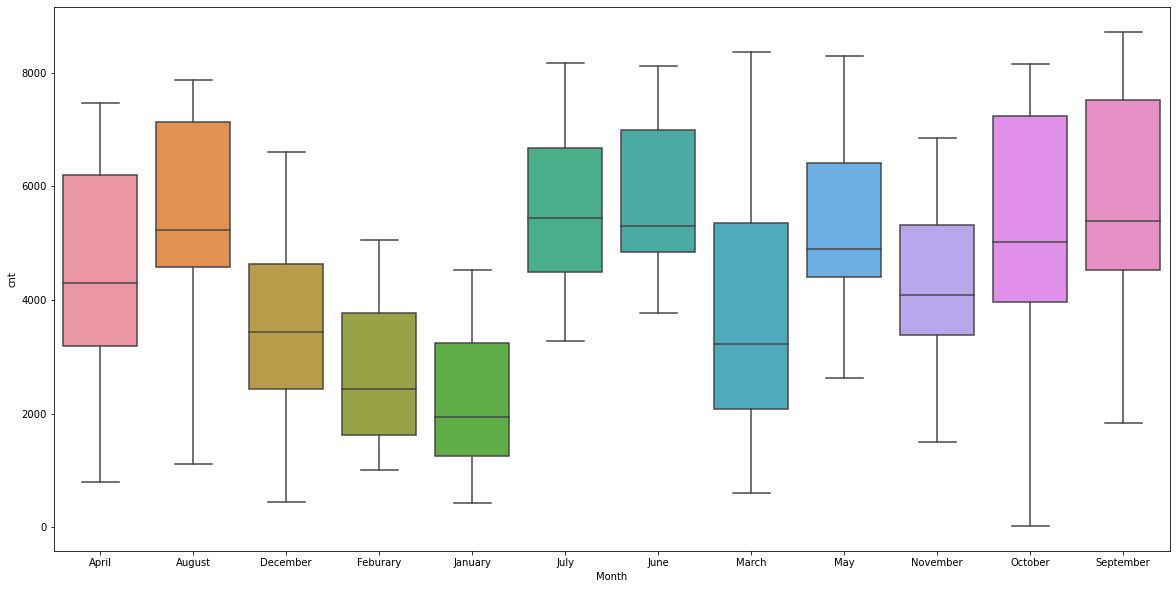

In [33]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Month', y = 'cnt', data = bike)
plt.show()

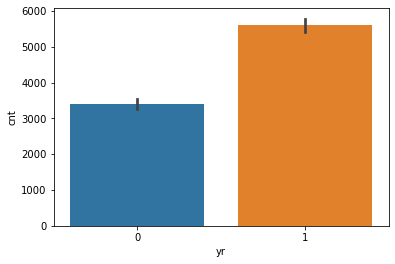

In [34]:
#Plotting barplot for Year
sns.barplot('yr','cnt',data=bike)
plt.show()

<div class="alert alert-block alert-success">
        <b>Inference:</b> 
            <p>We can clearly see that the demand is higher in <b>2019</b> than <b>2018</b></p>
</div>

### 5. Data Preparation

In [35]:
#Assigning the dummy variables for 'season','month','weekday','weathersit' and drop the first column using 'drop_first=True'

months     = pd.get_dummies(bike['Month'],drop_first=True)
weekdays   = pd.get_dummies(bike['Weekday'],drop_first=True)
weathersit = pd.get_dummies(bike['Weathersit'],drop_first=True)
seasons    = pd.get_dummies(bike['Seasons'],drop_first=True)

In [36]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Seasons,Month,Weekday,Weathersit
0,0,0,1,14.110847,80.5833,10.749882,985,Spring,January,Monday,Mist_Cloudy
1,0,0,1,14.902598,69.6087,16.652113,801,Spring,January,Tuesday,Mist_Cloudy
2,0,0,1,8.050924,43.7273,16.636703,1349,Spring,January,Wednesday,Clear
3,0,0,1,8.200000,59.0435,10.739832,1562,Spring,January,Thursday,Clear
4,0,0,1,9.305237,43.6957,12.522300,1600,Spring,January,Friday,Clear


In [37]:
#Concating the results to bike dataframe
bike=pd.concat([bike,months,weekdays,weathersit,seasons],axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Seasons,Month,Weekday,Weathersit,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
0,0,0,1,14.110847,80.5833,10.749882,985,Spring,January,Monday,Mist_Cloudy,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,Spring,January,Tuesday,Mist_Cloudy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,Spring,January,Wednesday,Clear,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,Spring,January,Thursday,Clear,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,Spring,January,Friday,Clear,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# Dropping 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['Seasons','Month','Weekday','Weathersit'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
#Checking the shape
bike.shape

(730, 29)

In [40]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   August       730 non-null    uint8  
 8   December     730 non-null    uint8  
 9   Feburary     730 non-null    uint8  
 10  January      730 non-null    uint8  
 11  July         730 non-null    uint8  
 12  June         730 non-null    uint8  
 13  March        730 non-null    uint8  
 14  May          730 non-null    uint8  
 15  November     730 non-null    uint8  
 16  October      730 non-null    uint8  
 17  September    730 non-null    uint8  
 18  Monday       730 non-null    uint8  
 19  Saturday

### 6. Splitting the Dataframe for Training and Testing

In [41]:
# Train and Test the bike dataframe - we have split the Train and Test data to be 70% & 30%
train, test = train_test_split(bike, train_size = 0.70, random_state = 100)

In [42]:
#Rows and columns after split

print(train.shape)
print(test.shape)

(510, 29)
(220, 29)


In [43]:
train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,61.934025,12.598352,4560.559091,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,7.672796,14.429542,4.973534,1904.968544,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,72.179375,15.385361,5913.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-success">
        <b>Inference:</b> 
            <p> -  We have split the data into 70% & 30% for Training and Testing. 
                We have a total of <b>510 rows </b> in Training dataset and <b>220 rows</b> for Testing dataset</p>
</div>

### 7. Rescaling the features

In [45]:
#Rescaling the MinMaxScaler
scaler = MinMaxScaler()

In [46]:
train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,72.9583,14.707907,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [47]:
#Applying Standard Scaler to 'temp', 'hum', 'windspeed', 'cnt' columns

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [48]:
train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,Feburary,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8. Building Linear Regression Model

In [49]:
#Divide into X and y sets for training
X_train = train
y_train = train.pop('cnt') # target variable

#### Recursive Feature Elimination (RFE)

In [50]:
# Use linear regression as the model and RFE to select 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 9),
 ('December', True, 1),
 ('Feburary', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [51]:
print('RFE Support True  : ',(rfe.support_==True).sum())
print('RFE Support False : ',(rfe.support_==False).sum())

RFE Support True  :  15
RFE Support False :  13


Inference:

RFE Support True  :  15
<br/>
RFE Support False :  13

In [52]:
#Selected 15 variables
selCols = X_train.columns[rfe.support_]
selCols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'December', 'January', 'July', 'November', 'September', 'Light_Snow', 'Mist_Cloudy', 'Spring', 'Summer', 'Winter'], dtype='object')

In [53]:
#Missed Columns
missCols = X_train.columns[~rfe.support_]
missCols

Index(['workingday', 'August', 'Feburary', 'June', 'March', 'May', 'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

In [54]:
# Creating X_train dataframe with RFE & VIF selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_vif = X_train[X_train.columns[rfe.support_]]

In [55]:
# Function for executing the linear model 
def model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#Function for executing the VIF model
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [56]:
X_train_new = model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.15e-189
Time:                        16:21:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      

In [57]:
vif(X_train_new)

,Features,VIF
0,const,82.52
13,Spring,5.27
3,temp,4.42
15,Winter,3.83
14,Summer,2.77
4,hum,1.92
9,November,1.77
7,January,1.68
12,Mist_Cloudy,1.57
6,December,1.50


In [58]:
# December has high VIF and P value
X_train_rfe_2 = X_train_rfe.drop(['December'], axis=1)

In [59]:
# Again re-modelling and checking p value and VIF

X_train_new = model(X_train_rfe_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.41e-189
Time:                        16:21:09   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3032      0.035      8.598      

In [60]:
vif(X_train_new)

,Features,VIF
0,const,78.35
12,Spring,5.20
3,temp,3.97
14,Winter,3.76
13,Summer,2.68
4,hum,1.90
6,January,1.57
11,Mist_Cloudy,1.56
7,July,1.49
8,November,1.49


In [61]:
# November has high VIF and P value
X_train_rfe_3 = X_train_rfe_2.drop(['November'], axis=1)

In [62]:
# Again re-modelling and checking p value and VIF

X_train_new = model(X_train_rfe_3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.59e-190
Time:                        16:21:09   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2964      0.035      8.483      

In [63]:
vif(X_train_new)

,Features,VIF
0,const,76.76
11,Spring,5.08
3,temp,3.89
13,Winter,3.59
12,Summer,2.65
4,hum,1.90
6,January,1.57
10,Mist_Cloudy,1.56
7,July,1.49
8,September,1.30


In [64]:
# January has high VIF and P value
X_train_rfe_4 = X_train_rfe_3.drop(['January'], axis=1)

In [65]:
# Again re-modelling and checking p value and VIF

X_train_new = model(X_train_rfe_4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.95e-190
Time:                        16:21:10   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2848      0.034      8.258      

In [66]:
vif(X_train_new)

,Features,VIF
0,const,74.37
10,Spring,5.02
3,temp,3.61
12,Winter,3.48
11,Summer,2.62
4,hum,1.89
9,Mist_Cloudy,1.56
6,July,1.48
7,September,1.30
8,Light_Snow,1.24


In [67]:
# Spring has high VIF and P value
X_train_rfe_5 = X_train_rfe_4.drop(['Spring'], axis=1)

In [68]:
# Again re-modelling and checking p value and VIF

X_train_new = model(X_train_rfe_5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.89e-190
Time:                        16:21:10   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2262      0.027      8.384      

In [69]:
vif(X_train_new)

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
9,Mist_Cloudy,1.55
6,July,1.43
10,Summer,1.33
11,Winter,1.29
8,Light_Snow,1.24
7,September,1.19
5,windspeed,1.18


<div class="alert alert-block alert-success">
        <b>Inference:</b> 
    <p>We can see that the P-Value is almost <b>0</b> and max VIF is <b>1.87</b> (less than 2). </p>
</div>

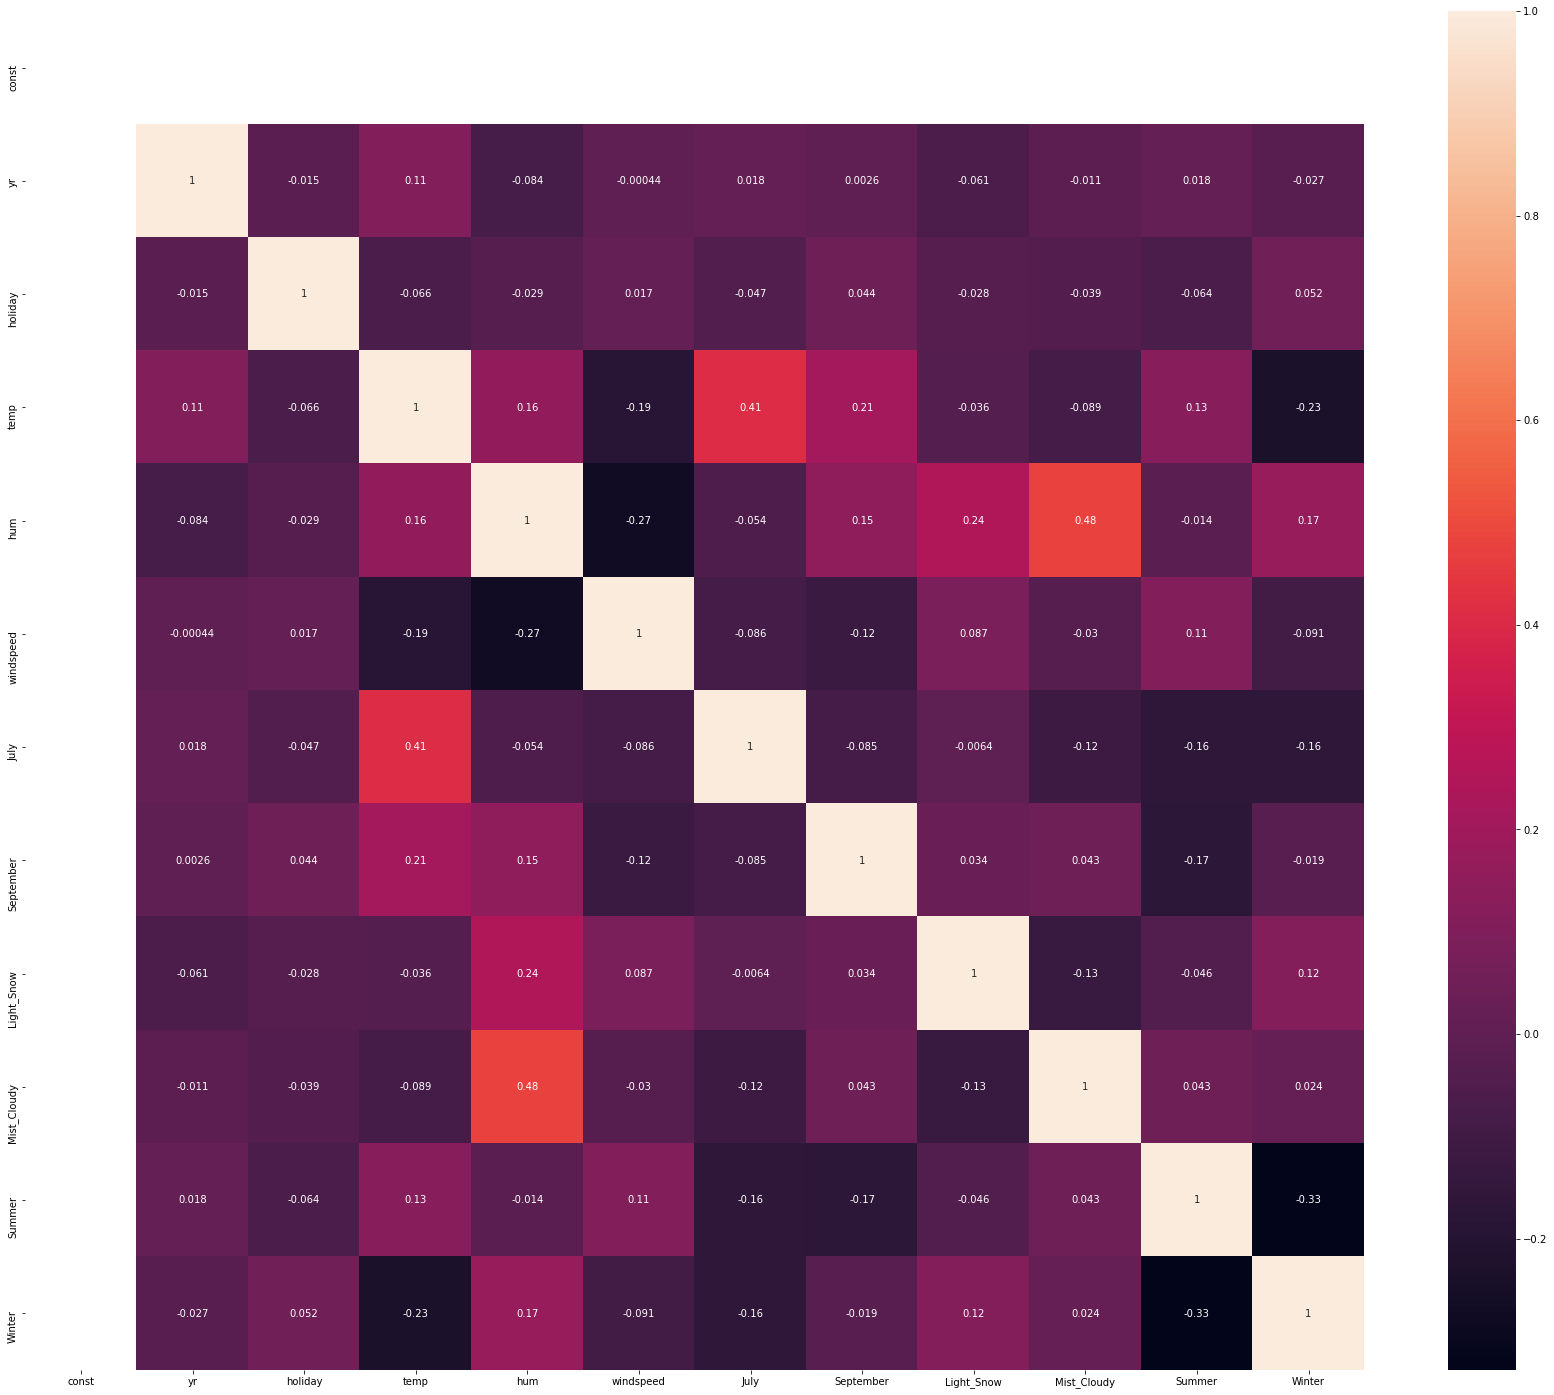

In [70]:
# Using Heatmap let's check the correlation
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_new.corr(), annot = True)
plt.show()

In [71]:
# From the above Heatmap we can see that humidity has higher negative value
X_train_new=X_train_new.drop(['hum'], axis = 1)

In [72]:
# Again re-modelling and checking p value and VIF

X_train_new = model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.52e-186
Time:                        16:21:12   Log-Likelihood:                 493.69
No. Observations:                 510   AIC:                            -965.4
Df Residuals:                     499   BIC:                            -918.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1219      0.017      7.251      

In [73]:
vif(X_train_new)

,Features,VIF
0,const,16.70
3,temp,1.50
5,July,1.42
9,Summer,1.33
10,Winter,1.24
6,September,1.19
4,windspeed,1.09
7,Light_Snow,1.05
8,Mist_Cloudy,1.04
1,yr,1.02


<div class="alert alert-block alert-success">
    <b>Inference:</b> 
    <p></p>
    <ul>
        <li>R-squared is <b>83.2%</b> and Adjusted R-Squared is <b>82.9%</b></li>
        <li>P-value of the model is <b>0</b></li>
        <li>Prob (F-statistic) is almost <b>0</b></li>
        <li>We can see that VIF is <b>1.50</b> (well under 2)</li>
    </ul>
</div>

### 9. Residual Analysis

In [74]:
X_train_new

,const,yr,holiday,temp,windspeed,July,September,Light_Snow,Mist_Cloudy,Summer,Winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,1,0


In [75]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

<Figure size 432x288 with 0 Axes>

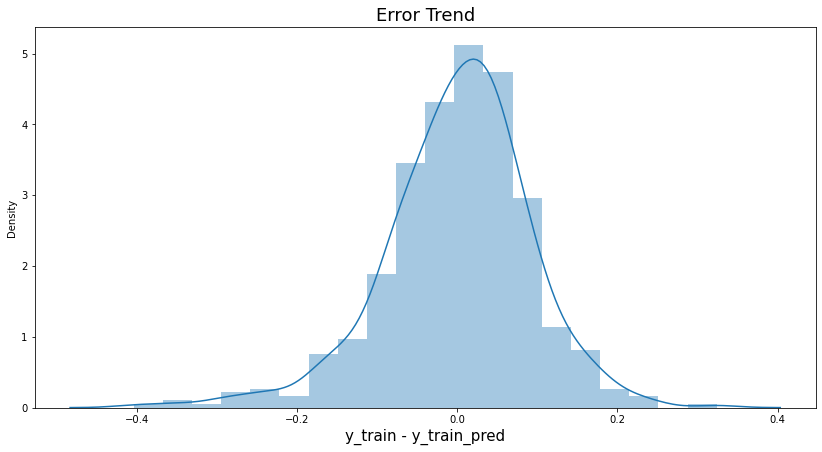

In [76]:
# Plotting a histogram of error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Trend', fontsize = 18)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

<div class="alert alert-block alert-info">
        <b>Inference:</b> 
    <p>The <i><b>Error Terms</b></i> seems to be normally distributed as seen in the above distplot.</p>
</div>

In [77]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
test[num_vars] = scaler.fit_transform(test[num_vars])

In [78]:
#Divide into X and y sets for testing
X_test = test
y_test = test.pop('cnt') # target variable

In [79]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [80]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [81]:
r2=r2_score(y_test, y_pred)
print('R-Squared Value : ',round((r2*100),2))

R-Squared Value :  78.42


In [82]:
# In the above step we already have the value of R-Squared 
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-Squared :', round((adjusted_r2*100),2))

Adjusted R-Squared : 77.28


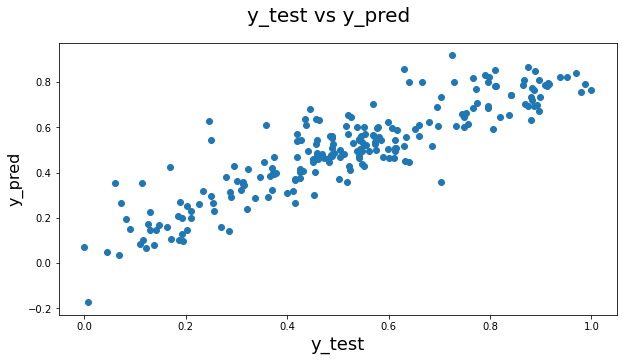

In [83]:
#Evaluating the Test model (y_test)
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

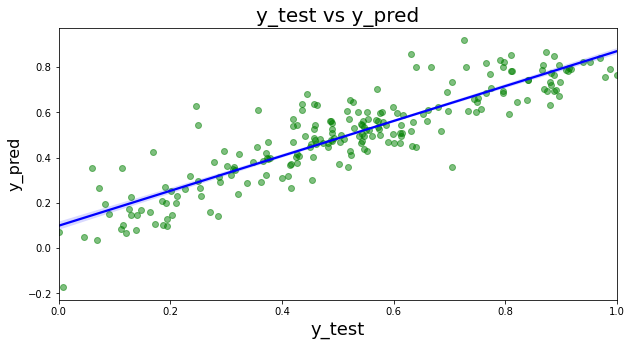

In [84]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green","alpha":0.5}, line_kws={"color": "blue"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### 10. Final Results

<div class="alert alert-block alert-success">
    <b>Training Results:</b> 
    <p></p>
    <ul>
        <li>R-squared is <b>83.2%</b> and Adjusted R-Squared is <b>82.9%</b></li>
        <li>P-value of the model is <b>0</b></li>
        <li>Prob (F-statistic) is almost <b>0</b></li>
        <li>We can see that VIF is <b>1.50</b> (well under 2)</li>
    </ul>
    <br/>
    <b>Testing Results:</b> 
    <p></p>
    <ul>
        <li>R-squared is <b>78.42%</b> and Adjusted R-Squared is <b>77.28%</b></li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b>Hypothesis Testing :</b> 
    <li>Our P-Value is almost zero which is very much less than 5% and hence we can <b><i><u>Reject Null Hypothesis</u></i></b></li>
</div>